---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Machine Learning Algorithms

## Comprehensive Clustering Algorithm

Five machine learning models were constructed to predict home prices in Utah: Bayesian Ridge, Linear Regression, ElasticNet, SVR, and GBR. These models are trained based on the characteristics of houses (e.g., size, number of bedrooms, etc.) to predict house prices. To evaluate the performance of the models, a cross-validation approach was used to ensure the stability and reliability of the results through multiple training and testing.

In [26]:
#| echo: true 
#| code-fold: true
X = df.drop(['text','pricePerSqft',"lastSoldOn"],axis=1)
y = df['pricePerSqft']
X = pd.get_dummies(X, drop_first=True, dtype='int')

In [28]:
#| echo: true 
#| code-fold: true
X = X
y = df['pricePerSqft'].values
n_folds=5
#Bayesling regression model
br_model = BayesianRidge()
#Linear regression
lr_model = LinearRegression()
#Elastic network regression model
etc_model = ElasticNet()
#Support vector machine regression
svr_model = SVR()
#Gradient enhanced regression model
gbr_model = GradientBoostingRegressor(random_state=1)
#A list of names for different models
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
cv_score_list = []
pre_y_list = []
for model in model_dic:
    scores = cross_val_score(model,X,y,cv=n_folds) #Model cross-validation
    cv_score_list.append(scores)                  
    pre_y_list.append(model.fit(X,y).predict(X))   #Prediction results on the test set
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_score

,0,1,2,3,4
BayesianRidge,0.331879,0.476998,-0.246165,0.375415,0.245122
LinearRegression,0.332096,0.483609,-0.253943,0.378228,0.245462
ElasticNet,0.130439,0.001475,-0.010112,0.047115,0.087906
SVR,-0.026903,-0.018592,-0.007262,-0.012425,-0.021750
GBR,0.591863,0.481195,0.190811,0.603570,0.266486


In [29]:
#| echo: true 
#| code-fold: true
### Evaluation of model effect index ###
n_sample, n_feature = X.shape
# Regression evaluation index object list
model_metrics_name = [explained_variance_score,
                      mean_absolute_error,
                      mean_squared_error,r2_score]
# Regression evaluation index list
model_metrics_list = []
# Loop through the predictions of each model
for pre_y in pre_y_list:
    tmp_list = []
    for mdl in model_metrics_name:
        tmp_score = mdl(y, pre_y)
        tmp_list.append(tmp_score)
    model_metrics_list.append(tmp_list)
df_met = pd.DataFrame(model_metrics_list, index=model_names,
                      columns=['ev', 'mae', 'mse', 'r2'])
df_met

,ev,mae,mse,r2
BayesianRidge,0.310648,116.273722,99634.907167,0.310648
LinearRegression,0.310672,116.214159,99631.443272,0.310672
ElasticNet,0.038671,125.347216,138944.822627,0.038671
SVR,0.004330,121.447129,146445.779432,-0.013226
GBR,0.728965,88.184705,39173.747357,0.728965


Based on the evaluation metrics provided, the gradient boosting regression model demonstrated optimal performance in predicting Utah home prices. The mean absolute error and mean square error were better than other models, and the R-squared value was as high as 0.728965, indicating that the model explains a large portion of the home price variability. Despite the relatively low mae of ElasticNet, GBR is superior in terms of the composite metrics, especially its mse is much lower than that of the other models, showing higher prediction accuracy. Thus, the gradient boosted regression model is considered the optimal choice for predicting house prices in Utah.

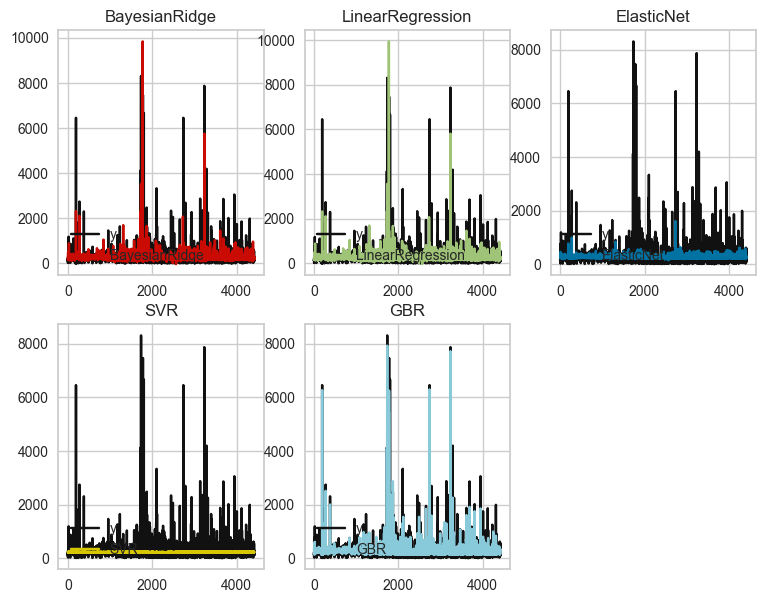

In [30]:
#| echo: true 
#| code-fold: true
plt.figure(figsize=(9, 7))
color_list = ['r','g','b','y','c']
for i, pre_y in enumerate(pre_y_list):
    plt.subplot(2, 3, i+1)
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    # Draw prediction lines for each model
    plt.plot(np.arange(X.shape[0]),
             pre_y,
             color_list[i],
             label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.show()

By comparing the results of multiple regression models, we can see that the best model is the gradient enhanced regression model.

## Optimal Algorithmic Grid Tuning Parameters

In [31]:
#| echo: true 
#| code-fold: true
def MSE(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [32]:
#| echo: true 
#| code-fold: true
X = df.drop(['text','pricePerSqft',"lastSoldOn"],axis=1)
y = df['pricePerSqft']
X = pd.get_dummies(X, drop_first=True, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,test_size=0.2)
#Grid Search
params={'subsample':[0.65, 0.7, 0.75],
        'n_estimators':[30, 50, 100],
        'learning_rate':[0.05, 0.075, 0.1],
        'max_depth':[3, 4, 5]
        }
gbr = GradientBoostingRegressor(random_state=1)
# Instantiate RandomizedSearchCV as rand_reg
rand_reg = RandomizedSearchCV(gbr, params, n_iter=3, scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=2)
rand_reg.fit(X_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print("Best params:", best_params)
best_score = np.sqrt(-rand_reg.best_score_)
print("Training score: {:.3f}".format(best_score))
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**0.5
print('Test set score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.65, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.075}
Training score: 287.294
Test set score: 396.865


The RandomizedSearchCV method was used to randomly search for the optimal combinations within the specified parameter ranges by performing mesh tuning on the gradient-enhanced model. Eventually, the optimal model parameters were obtained and the model was trained based on these parameters. The performance of the model on the training and test sets was evaluated by the root mean square error, and the results showed the effectiveness and prediction accuracy of the model.

## Model Variable Importance Results

In [33]:
#| echo: true 
#| code-fold: true
# Importance of variable
pd.concat((pd.DataFrame(X.columns,columns = ['feature']), 
           pd.DataFrame(rand_reg.best_estimator_.feature_importances_,
                        columns = ['importance'])), 
          axis = 1).sort_values(by='importance',
                                ascending = False)


,feature,importance
5,lot_sqft,0.667378
1,baths,0.111691
4,garage,0.069299
3,baths_half,0.067300
2,baths_full,0.033914
7,age,0.020846
9,type_land,0.011464
0,beds,0.009646
10,type_mobile,0.003871
8,type_farm,0.002482


The results of the optimal gradient boosting regression model, and the variable importance results show that parcel size has the greatest impact on house price prediction with 66.7%. baths (number of baths) follows with 11.2%.Other variables such as garage and baths_half also have an impact, while characteristics such as housing type and condition have little effect on the predictions.


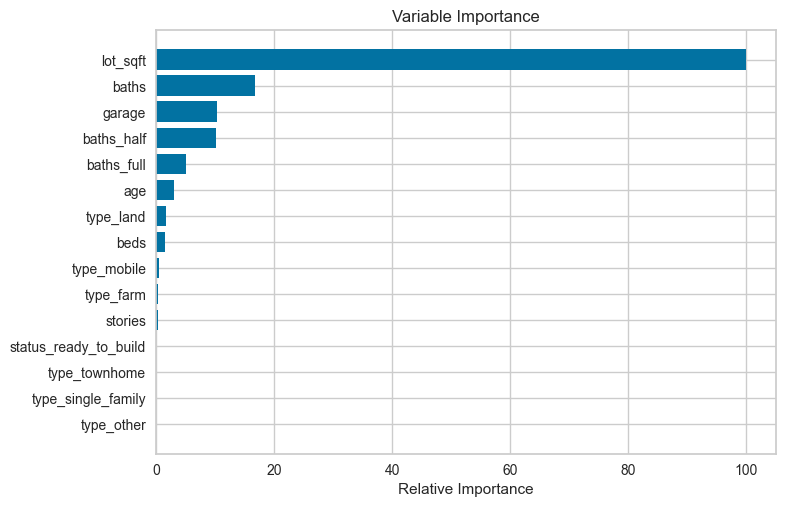

In [34]:
#| echo: true 
#| code-fold: true
# Plot feature importance
feature_importance = rand_reg.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
